# An example for data loading and visualization

In [25]:
import geopandas as gpd
import networkx as nx
from shapely import LineString
import pickle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import os
import pickle
import numpy as np
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

Load the network and the corresponding weather objects from a specific pkl file

In [33]:
# replace it with your own file path
with open("2014-03-30.pkl", "rb") as f:
    N = pickle.load(f)
    W = pickle.load(f)

network info

In [34]:
print("Network:", N)

Network: Graph with 24457 nodes and 86195 edges


weather info

In [35]:
print("Weather:", W)

Weather: {'temperature_2m_max': 17.886999130249023, 'temperature_2m_min': 9.53700065612793, 'temperature_2m_mean': 12.895331382751465, 'precipitation_sum': 0.0, 'precipitation_hours': 0.0}


load shanghai voronoi shapefile

In [36]:
# replace it with your own file path
polygon_shp = gpd.read_file('Voronoi_shanghai/Voronoi_shanghai.shp', encoding='utf-8')
polygon_shp = polygon_shp.to_crs(epsg=4326)

Randomly select a residential polygon to plot its edges in this network

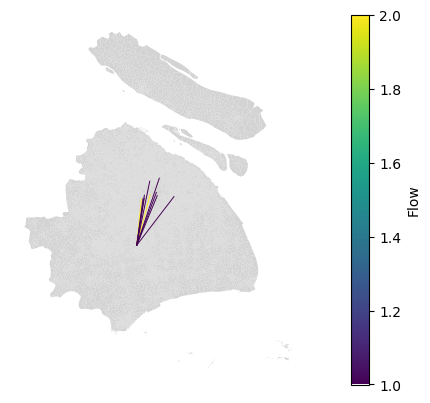

In [42]:
lines = []
flows = []
grid_nodes = [node for node, data in N.nodes(data=True) if data.get('type') == 'poly']
if grid_nodes:
    # randomly select a residential polygon
    random_grid_node = random.choice(grid_nodes)

for edge in N.edges(random_grid_node):
    node1, node2 = edge
    edge_data = N.get_edge_data(node1, node2)

    point_str = N.nodes[node1]['point']
    lon1, lat1 = map(float, point_str.replace('POINT (', '').replace(')', '').split())
    lon2 = N.nodes[node2]['lng']
    lat2 = N.nodes[node2]['lat']

    # create LineString and add to list
    line = LineString([(lon1, lat1), (lon2, lat2)])
    lines.append(line)
    # plot heatmap lines based on the flow
    flows.append(edge_data.get('flow'))

# GeoDataFrame for line
lines_gdf = gpd.GeoDataFrame(geometry=lines, crs='EPSG:4326')

# create normalized color maps based on flow
norm = mcolors.Normalize(vmin=min(flows), vmax=max(flows), clip=True)
mapper = plt.cm.ScalarMappable(norm=norm, cmap='viridis')

fig, ax = plt.subplots()
polygon_shp.plot(ax=ax, color='lightgray')
# start by drawing lines for large values
for line, flow in sorted(zip(lines, flows), key=lambda x: x[1], reverse=True):
    plt.plot(*line.xy, color=mapper.to_rgba(flow), linewidth=0.7)
plt.colorbar(mapper, ax=ax, label='Flow')
plt.axis('off')
plt.show()